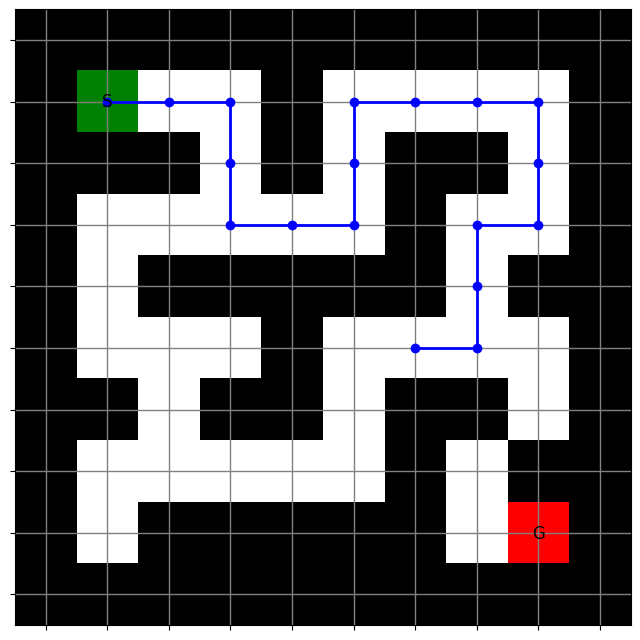

In [7]:
import heapq
import time
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# --- 1. Maze Data and Constants ---
# 0 = path, 1 = wall, 2 = start, 3 = goal
MAZE = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 2, 0, 0, 1, 0, 0, 0, 0, 1],
    [1, 1, 1, 0, 1, 0, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 1, 0, 0, 1],
    [1, 0, 1, 1, 1, 1, 1, 0, 1, 1],
    [1, 0, 0, 0, 1, 0, 0, 0, 0, 1],
    [1, 1, 0, 1, 1, 0, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 1, 0, 1, 1],
    [1, 0, 1, 1, 1, 1, 1, 0, 3, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
]

# Find start and goal coordinates
START = next((r, c) for r, row in enumerate(MAZE) for c, val in enumerate(row) if val == 2)
GOAL = next((r, c) for r, row in enumerate(MAZE) for c, val in enumerate(row) if val == 3)
ROWS, COLS = len(MAZE), len(MAZE[0])

# --- 2. A* Search Algorithm ---
def heuristic(a, b):
    """Calculates Manhattan distance heuristic."""
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def a_star_search(maze, start, goal):
    """Finds the optimal path using the A* algorithm."""
    open_set = [(0, start)]  # (f_score, position)
    came_from = {}
    g_score = { (r, c): float('inf') for r in range(ROWS) for c in range(COLS) }
    g_score[start] = 0
    f_score = { (r, c): float('inf') for r in range(ROWS) for c in range(COLS) }
    f_score[start] = heuristic(start, goal)

    all_paths = [] # To store all intermediate paths for animation

    while open_set:
        current_f, current = heapq.heappop(open_set)

        # Capture current path for animation
        path = []
        temp = current
        while temp in came_from:
            path.append(temp)
            temp = came_from[temp]
        path.append(start)
        all_paths.append(path[::-1]) # Reverse and store

        if current == goal:
            return all_paths, all_paths[-1] # Return all steps and the final path

        for dr, dc in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
            neighbor = (current[0] + dr, current[1] + dc)

            if 0 <= neighbor[0] < ROWS and 0 <= neighbor[1] < COLS and maze[neighbor[0]][neighbor[1]] != 1:
                tentative_g_score = g_score[current] + 1
                if tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))
    return all_paths, None # No path found

# --- 3. Visualization with Matplotlib ---
def create_visualization(maze, paths, final_path):
    """Creates an animated visualization of the maze solving."""
    fig, ax = plt.subplots(figsize=(8, 8))

    # Create a color map for the maze
    color_map = {0: 'white', 1: 'black', 2: 'green', 3: 'red'}
    grid = np.array(maze)
    im = ax.imshow(grid, cmap=plt.cm.colors.ListedColormap([color_map[c] for c in sorted(color_map.keys())]))

    # Mark start and goal
    ax.text(START[1], START[0], 'S', ha='center', va='center', color='black', fontsize=12)
    ax.text(GOAL[1], GOAL[0], 'G', ha='center', va='center', color='black', fontsize=12)

    ax.set_xticks(np.arange(COLS))
    ax.set_yticks(np.arange(ROWS))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(which='major', color='gray', linestyle='-', linewidth=1)

    line, = ax.plot([], [], 'o-', color='blue', lw=2) # Agent's path

    def init():
        line.set_data([], [])
        return line,

    def update(frame):
        if frame < len(paths):
            path = paths[frame]
            y_coords, x_coords = zip(*path)
            line.set_data(x_coords, y_coords)
        elif final_path and frame == len(paths):
            # Highlight the final path at the end
            y_coords, x_coords = zip(*final_path)
            line.set_color('orange')
            line.set_data(x_coords, y_coords)
        return line,

    ani = FuncAnimation(fig, update, frames=len(paths) + 1, init_func=init, blit=True, interval=200)

    # Display the animation in Colab
    from IPython.display import HTML
    display(HTML(ani.to_jshtml()))

# --- 4. Main Execution ---
if __name__ == "__main__":
    all_paths, final_path = a_star_search(MAZE, START, GOAL)
    create_visualization(MAZE, all_paths, final_path)
